In [48]:
import os
# Disable oneDNN custom operations to prevent the TensorFlow warning about floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.models import load_model
from stacked_mnist_tf import DataMode, StackedMNISTData
from autoencoder import Autoencoder, plot_comparisons
from variational_autoencoder import VariationalAutoencoder
from verification_net import VerificationNet

In [49]:
batch_size = 2048

In [50]:
gen = StackedMNISTData(mode=DataMode.MONO_BINARY_MISSING, default_batch_size=9)
imgTest, clsTest = gen.get_random_batch(batch_size=8)

img, labels = gen.get_random_batch(training=False, batch_size=batch_size)
print(f"Batch has size: Images: {img.shape}; Labels {labels.shape}")

Batch has size: Images: (2048, 28, 28, 1); Labels (2048,)


encoded.shape (None, 4)
encoded.shape (8, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


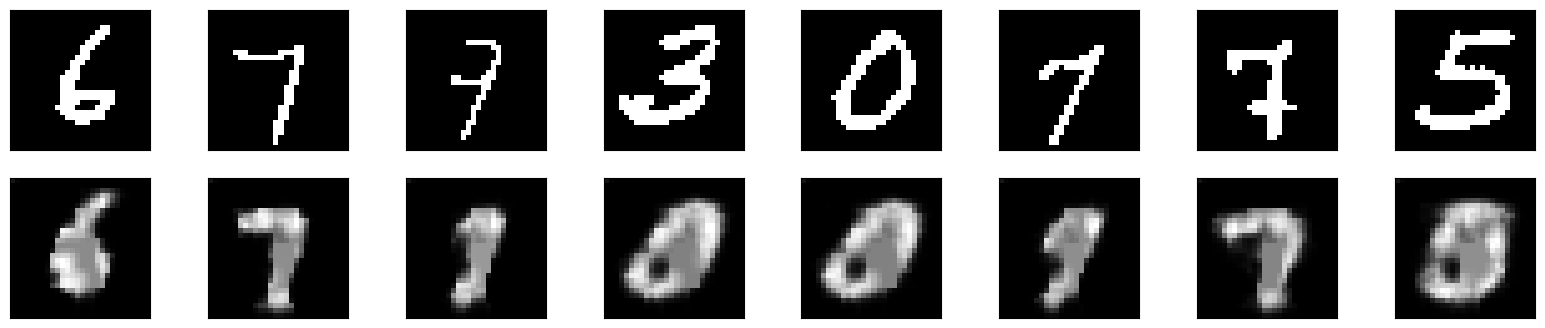

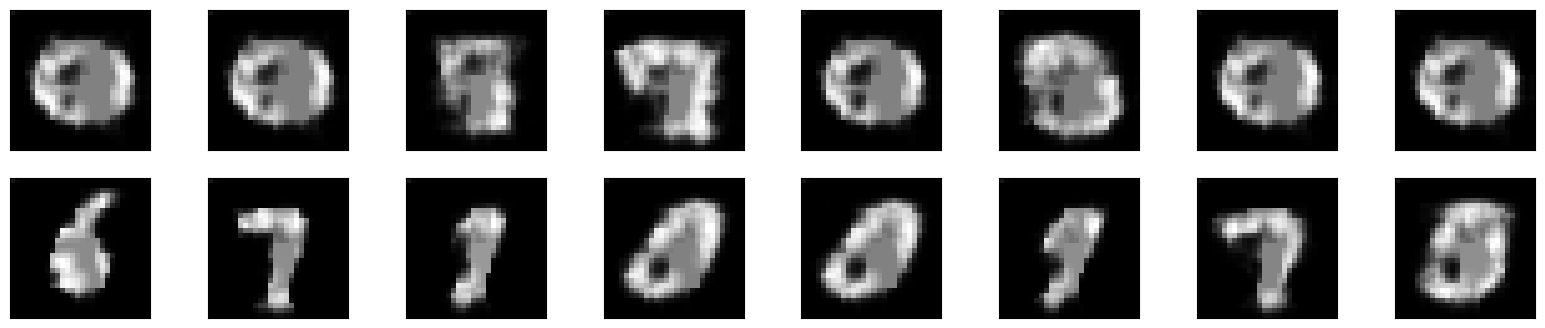

encoded.shape (None, 4)
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [51]:
AE = load_model('models/autoencoderWorking.keras', custom_objects={'Autoencoder': Autoencoder})

reconstructed_imgs = AE.predict(imgTest)
generated_imgs = AE.generate_images()
plot_comparisons(imgTest, reconstructed_imgs)
plot_comparisons(generated_imgs, reconstructed_imgs)

img_AE_reconstructed = AE.predict(img)
img_AE_generated = AE.generate_images(batch_size)

c:\Projects\.venv\Lib\site-packages\tf_keras\src\saving\serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: MultivariateNormalTriL.new(t, event_size, validate_args),

  config_arr = [serialize_keras_object(x) for x in obj]
c:\Projects\.venv\Lib\site-packages\tf_keras\src\saving\serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: IndependentBernoulli.new(  # pylint: disable=g-long-lambda
            t, event_shape, sample

encoded.shape (None, 16)
1/1 [==============================] - 1s 673ms/step


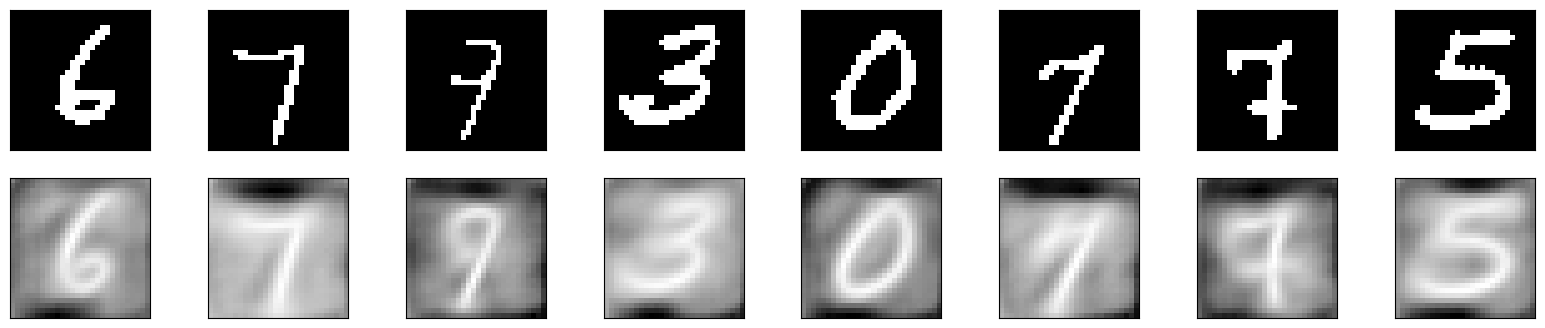

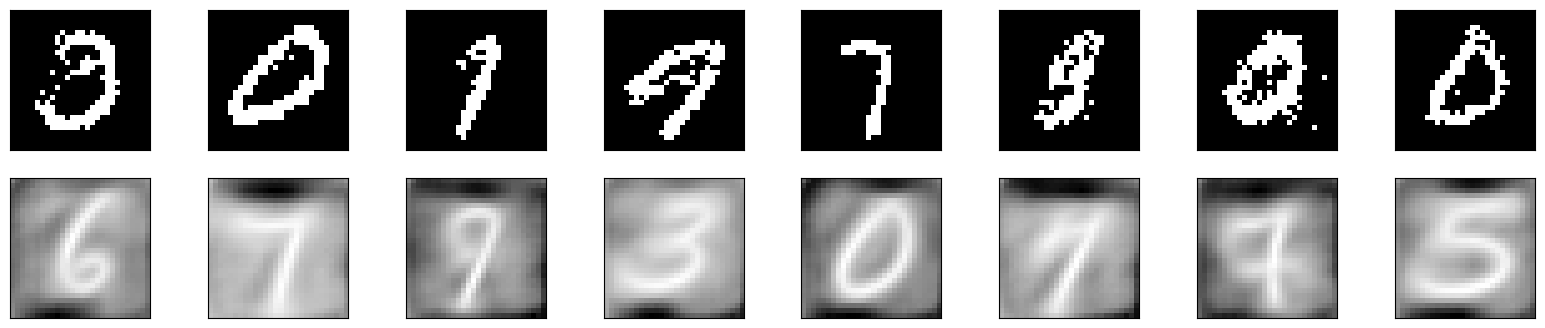

64/64 [==============================] - 2s 34ms/step


In [52]:
VAE = VariationalAutoencoder()
VAE.load_weights('models/variational_autoencoder.keras')

reconstructed_imgs = VAE.predict(imgTest)
generated_imgs = VAE.generate_images()
plot_comparisons(imgTest, reconstructed_imgs)
plot_comparisons(generated_imgs, reconstructed_imgs)


img_VAE_reconstructed = VAE.predict(img)
img_VAE_generated = VAE.generate_images(batch_size)

In [53]:
net = VerificationNet()
net.load_weights()

print(img.shape)
print(labels.shape)

cov = net.check_class_coverage(data=img, tolerance=0.98)
pred, acc = net.check_predictability(data=img, correct_labels=labels)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")
print(f"Accuracy: {100 * acc:.2f}%")


cov = net.check_class_coverage(data=img_AE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_AE_reconstructed, correct_labels=labels)
print(f"AE Coverage: {100*cov:.2f}%")
print(f"AE Predictability: {100*pred:.2f}%")
print(f"AE Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_AE_generated, tolerance=0.98)
print(f"AE generated Coverage: {100*cov:.2f}%")

cov = net.check_class_coverage(data=img_VAE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_VAE_reconstructed, correct_labels=labels)
print(f"VAE Coverage: {100*cov:.2f}%")
print(f"VAE Predictability: {100*pred:.2f}%")
print(f"VAE Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_VAE_generated, tolerance=0.98)
print(f"VAE generated Coverage: {100*cov:.2f}%")

(2048, 28, 28, 1)
(2048,)
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Coverage: 100.00%
Predictability: 98.05%
Accuracy: 97.46%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
AE Coverage: 10.00%
AE Predictability: 41.50%
AE Accuracy: 10.99%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
AE generated Coverage: 0.00%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
VAE Coverage: 80.00%
VAE Predictability: 92.19%
VAE Accuracy: 21.73%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
VAE generated Coverage: 100.00%
